In [1]:
#import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
#matplotlib setting
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

In [3]:
pcr_df = pd.read_csv('./농도테스트(201007).csv')

X1_10^5  X1_10^5.1  X1_10^5.2  X1_10^5.3  X1_10^5.4  X1_10^5.5  x2_10^5  \
0      2091       2105       1953       1811       2048       1996     2217   
1      2077       2094       1939       1810       2039       1981     2242   
2      2068       2085       1916       1806       2022       1982     2238   
3      2056       2065       1908       1797       2022       1978     2229   
4      2053       2056       1895       1798       2015       1975     2224   
5      2037       2051       1883       1795       2013       1967     2216   
6      2039       2058       1881       1792       2007       1962     2217   
7      2033       2066       1876       1787       2010       1957     2226   
8      2028       2062       1872       1782       2012       1954     2214   
9      2025       2061       1871       1780       2012       1952     2215   
10     2023       2054       1870       1775       2011       1950     2219   
11     2021       2056       1868       1770       2012       1948     2218   
12     2033       2050       1875       1773       2014       1948     2212   
13     2031       2053       1872       1772       2016       1951     2194   
14     2028       2052       1873       1774       2018       1947     2184   
15     2024       2053       1872       1768       2022       1947     2172   
16     2025       2054       1871       1772       2024       1947     2158   
17     2024       2056       1867       1774       2022       1946     2171   
18     2026       2053       1866       1770       2029       1953     2171   
19     2029       2055       1868       1777       2032       1951     2178   
20     2033       2059       1865       1777       2033       1957     2179   
21     2041       2060       1868       1778       2034       1967     2187   
22     2045       2061       1875       1783       2037       1983     2187   
23     2054       2072       1878       1789       2038       2018     2195   
24     2073       2083       1882       1792       2045       2073     2223   
25     2099       2104       1890       1804       2042       2168     2250   
26     2158       2143       1905       1823       2055       2330     2300   
27     2269       2220       1931       1860       2067       2556     2398   
28     2446       2346       1986       1921       2083       2829     2591   
29     2688       2532       2068       2039       2120       3111     2881   
30     2964       2768       2221       2220       2192       3401     3200   
31     3243       3025       2445       2469       2314       3656     3548   
32     3512       3277       2728       2761       2521       3898     3880   
33     3760       3518       3046       3060       2799       4080     4080   
34     3980       3729       3367       3350       3123       4080     4080   
35     4080       3920       3685       3623       3457       4080     4080   
36     4080       4080       3969       3874       3785       4080     4080   
37     4080       4080       4080       4080       4080       4080     4080   
38     4080       4080       4080       4080       4080       4080     4080   
39     4080       4080       4080       4080       4080       4080     4080   

    x2_10^5.1  x2_10^5.2  x2_10^5.3  ...  x4_10^3.4  x4_10^3.5  x4_10^3.6  \
0        2073       2091       2534  ...       2382       2348       2451   
1        2053       2065       2514  ...       2357       2347       2418   
2        2040       2051       2478  ...       2342       2355       2418   
3        2023       2041       2488  ...       2339       2358       2419   
4        2010       2040       2463  ...       2319       2375       2411   
5        2009       2035       2452  ...       2316       2356       2402   
6        2002       2025       2447  ...       2318       2370       2394   
7        1998       2026       2454  ...       2320       2377       2391   
8        1992       2018       2455  ...       2311       2395       24

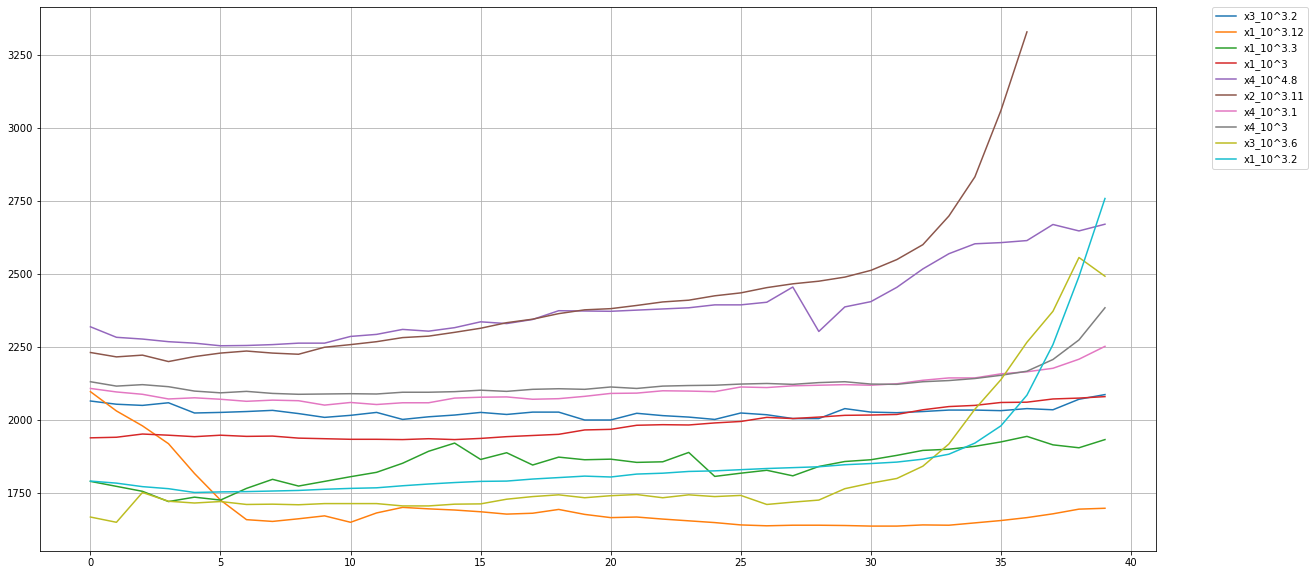

In [4]:
#drop Neg data
pcr_df = pcr_df.drop(columns=['X1_Neg', 'X2_Neg', 'X3_Neg', 'X4_Neg'])

#drop 10^6 data
pcr_df = pcr_df.drop(columns=['x1_10^6', 'x1_10^6.1',	'x1_10^6.2',	'x1_10^6.3',	'x1_10^6.4',	'x1_10^6.5'
                              ,	'x2_10^6',	'x2_10^6.1',	'x2_10^6.2',	'x2_10^6.3',	'x2_10^6.4'
                              ,	'x3_10^6',	'x3_10^6.1',	'x3_10^6.2',	'x3_10^6.3',	'x3_10^6.4'
                              ,	'x4_10^6',	'x4_10^6.1',	'x4_10^6.2',	'x4_10^6.3'])


#drop weird data
sns.lineplot(data=pcr_df[['x3_10^3.2', 'x1_10^3.12', 'x1_10^3.3', 'x1_10^3', 'x4_10^4.8','x2_10^3.11', 'x4_10^3.1', 'x4_10^3', 'x3_10^3.6', 'x1_10^3.2']], dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pcr_df = pcr_df.drop(columns=['x3_10^3.2', 'x1_10^3.12', 'x1_10^3.3', 'x1_10^3',  'x4_10^4.8','x2_10^3.11', 'x4_10^3.1', 'x4_10^3', 'x3_10^3.6', 'x1_10^3.2'])


display(pcr_df)

In [5]:
pcr_5_df = pd.DataFrame()
pcr_4_df = pd.DataFrame()
pcr_3_df = pd.DataFrame()

#Seperate each concentration(5, 4, 3)
for col in pcr_df.columns:
  if col[6] == '5':
    pcr_5_df = pcr_5_df.append(pcr_df[col])
  elif col[6] == '4':
    pcr_4_df = pcr_4_df.append(pcr_df[col])
  elif col[6] == '3':
    pcr_3_df = pcr_3_df.append(pcr_df[col])


print(f'10^5:{pcr_5_df.shape[0], pcr_5_df.shape[1]}, 10^4:{pcr_4_df.shape[0], pcr_4_df.shape[1]}, 10^3:{pcr_3_df.shape[0], pcr_3_df.shape[1]}')

10^5:(24, 40), 10^4:(71, 40), 10^3:(47, 40)


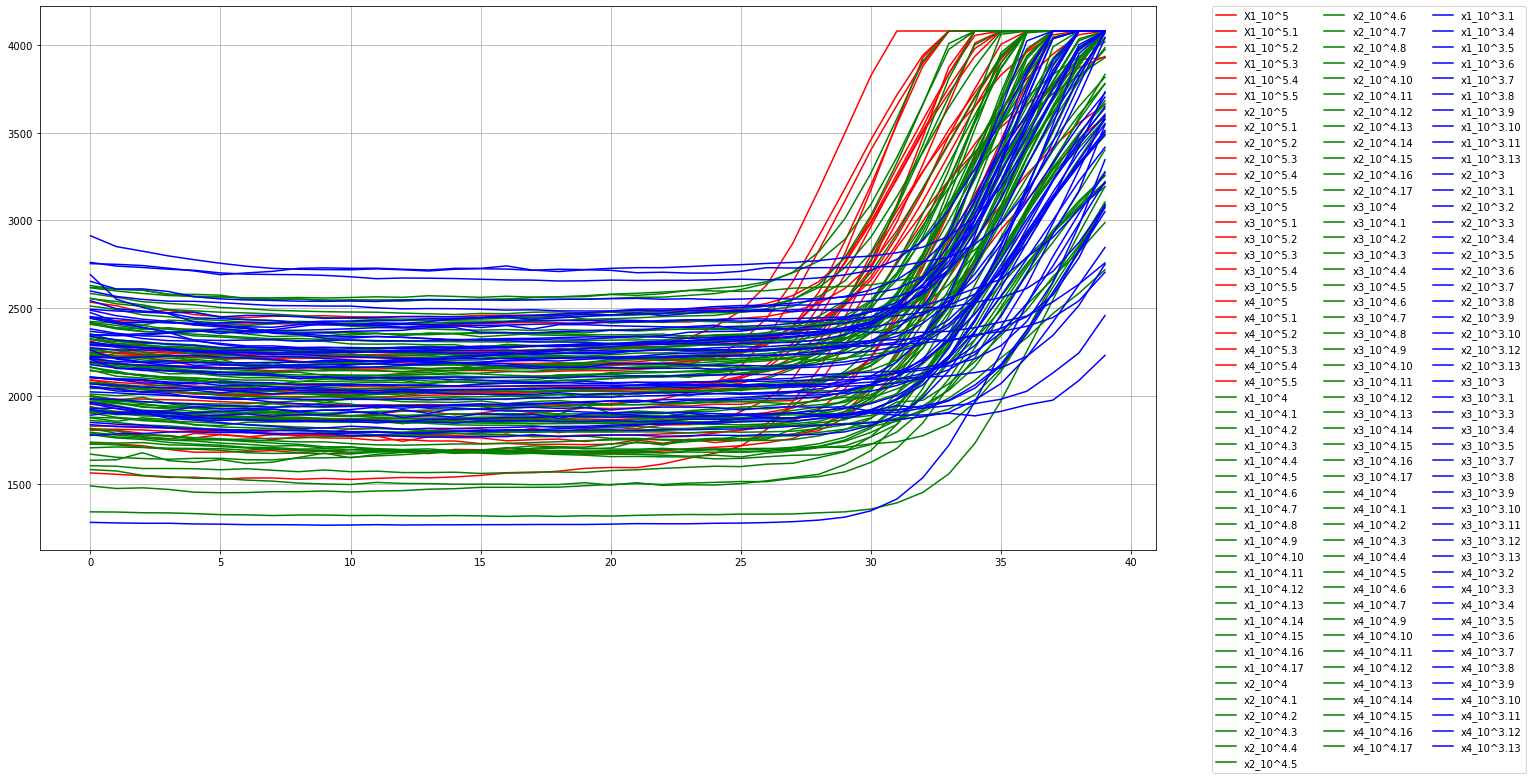

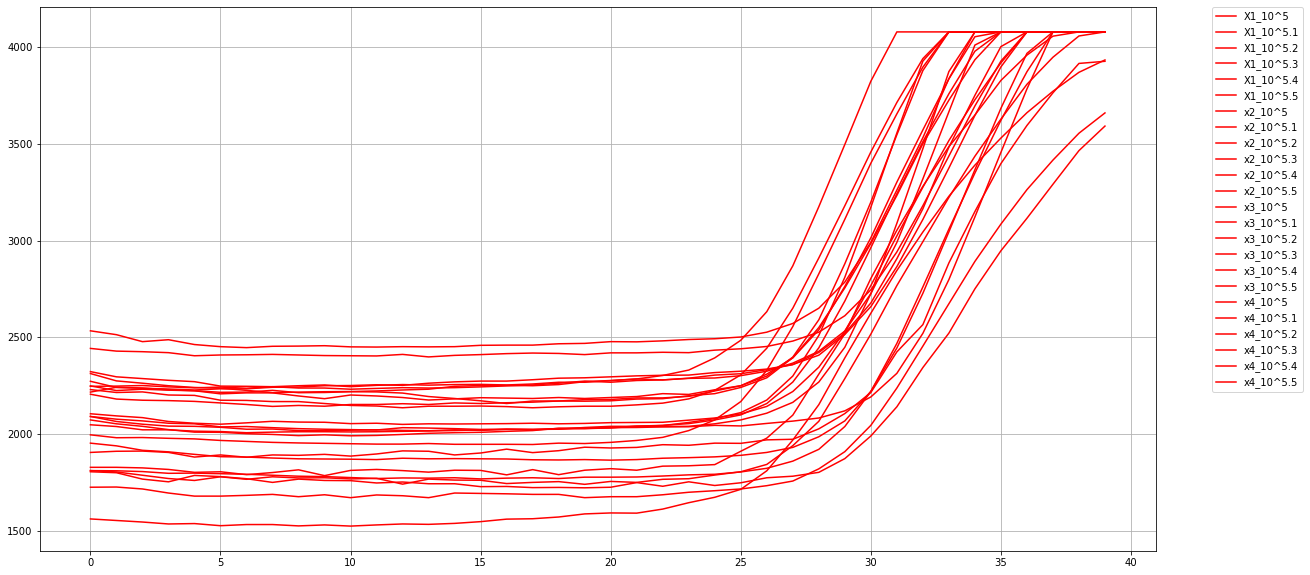

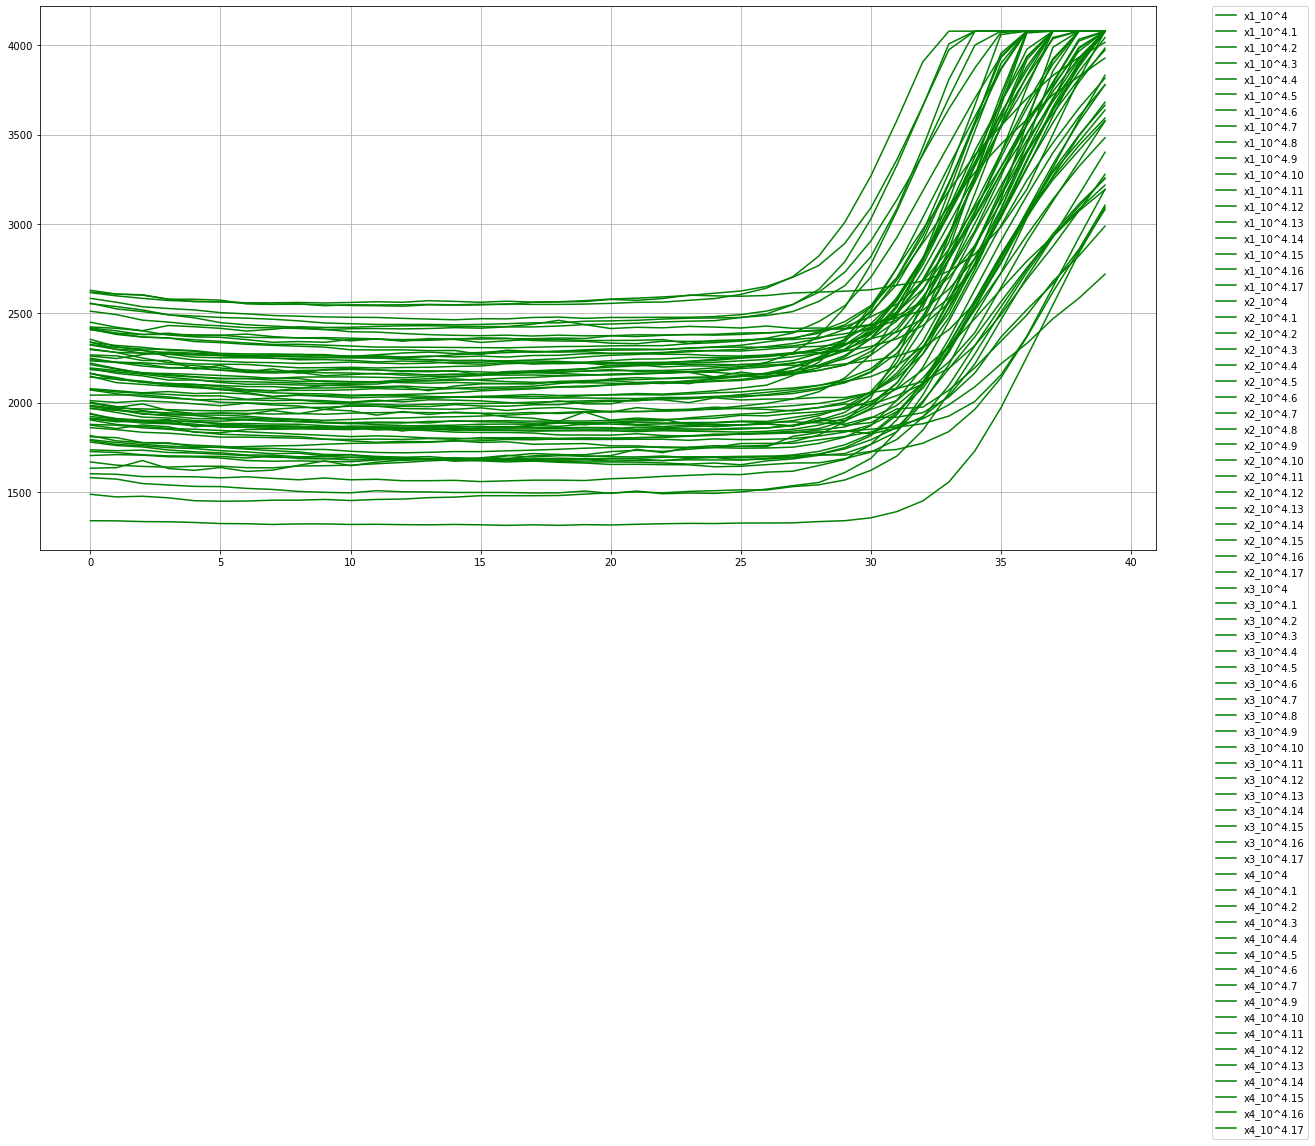

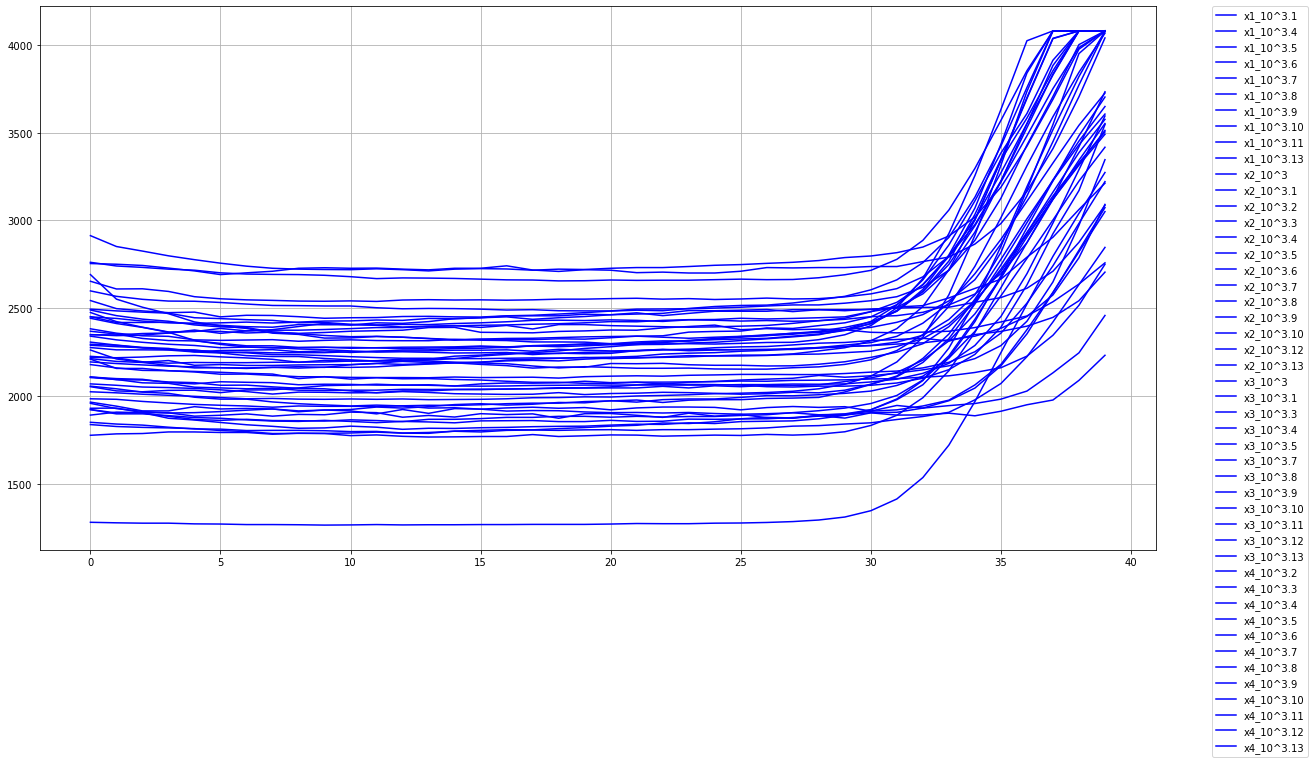

In [6]:
#plot all pcr data
sns.lineplot(data=pcr_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
sns.lineplot(data=pcr_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
sns.lineplot(data=pcr_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3)
plt.show()

#plot 10^5 data
sns.lineplot(data=pcr_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^4 data
sns.lineplot(data=pcr_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^3 data
sns.lineplot(data=pcr_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

In [7]:
#Baseline fitting
pcr_lam_df = pcr_df - pcr_df.loc[:10].mean(axis=0)

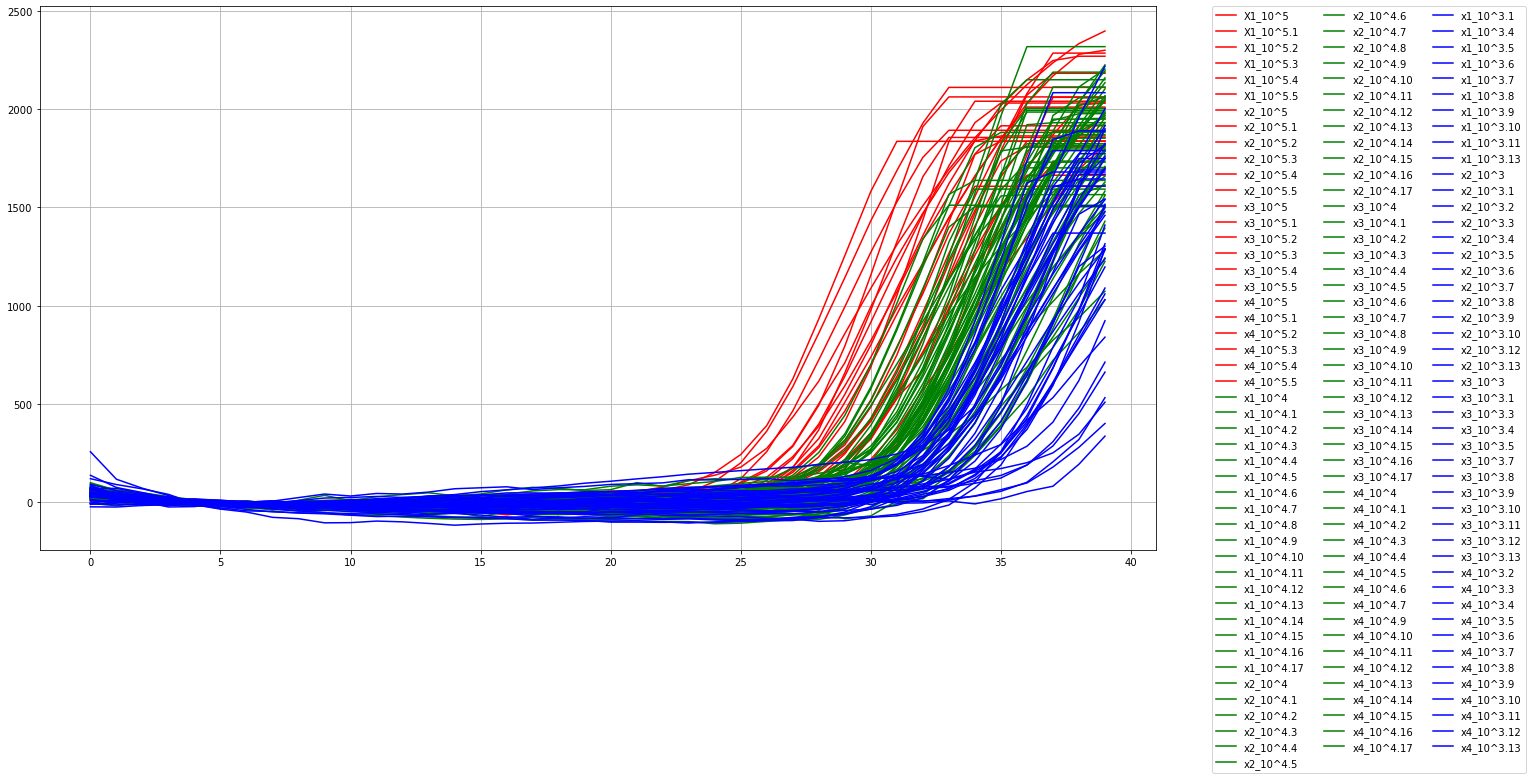

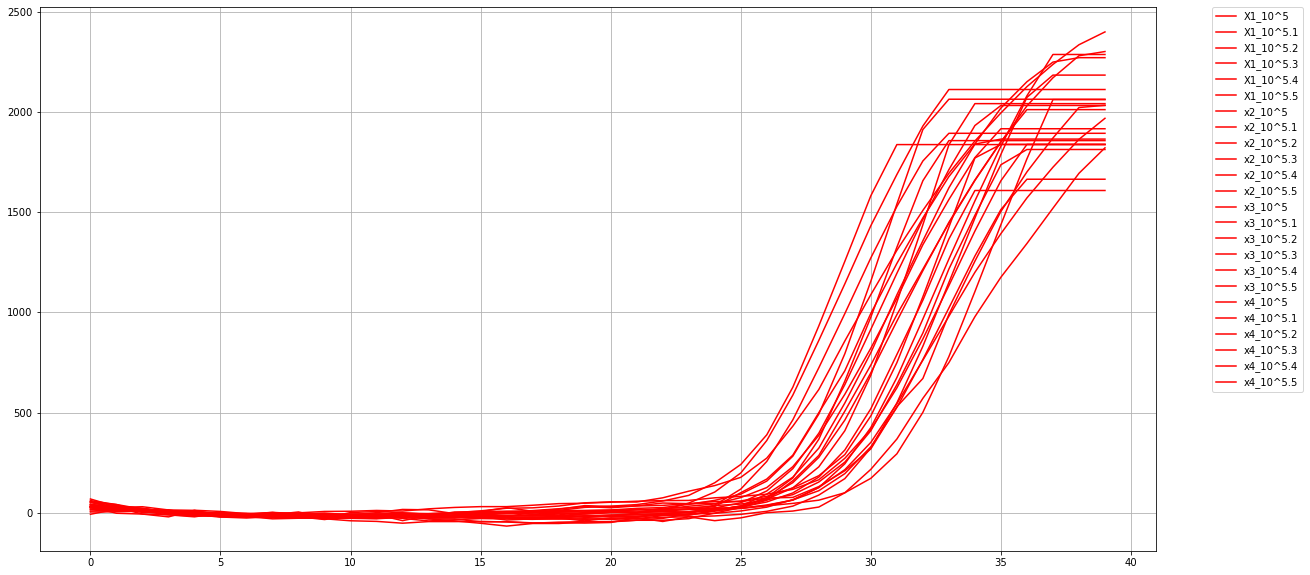

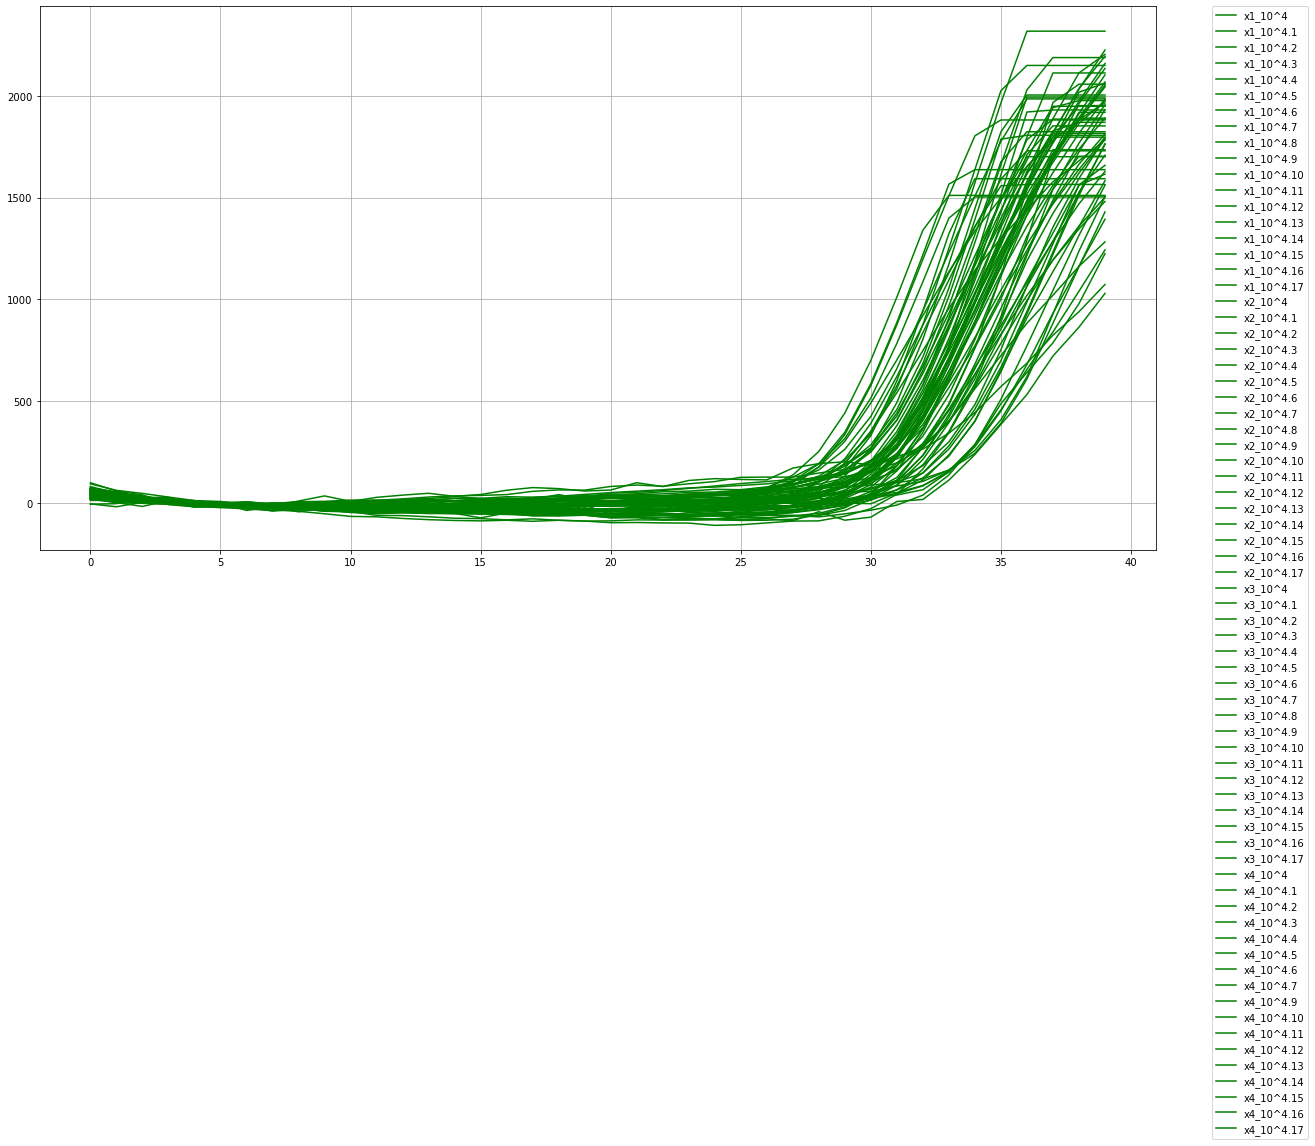

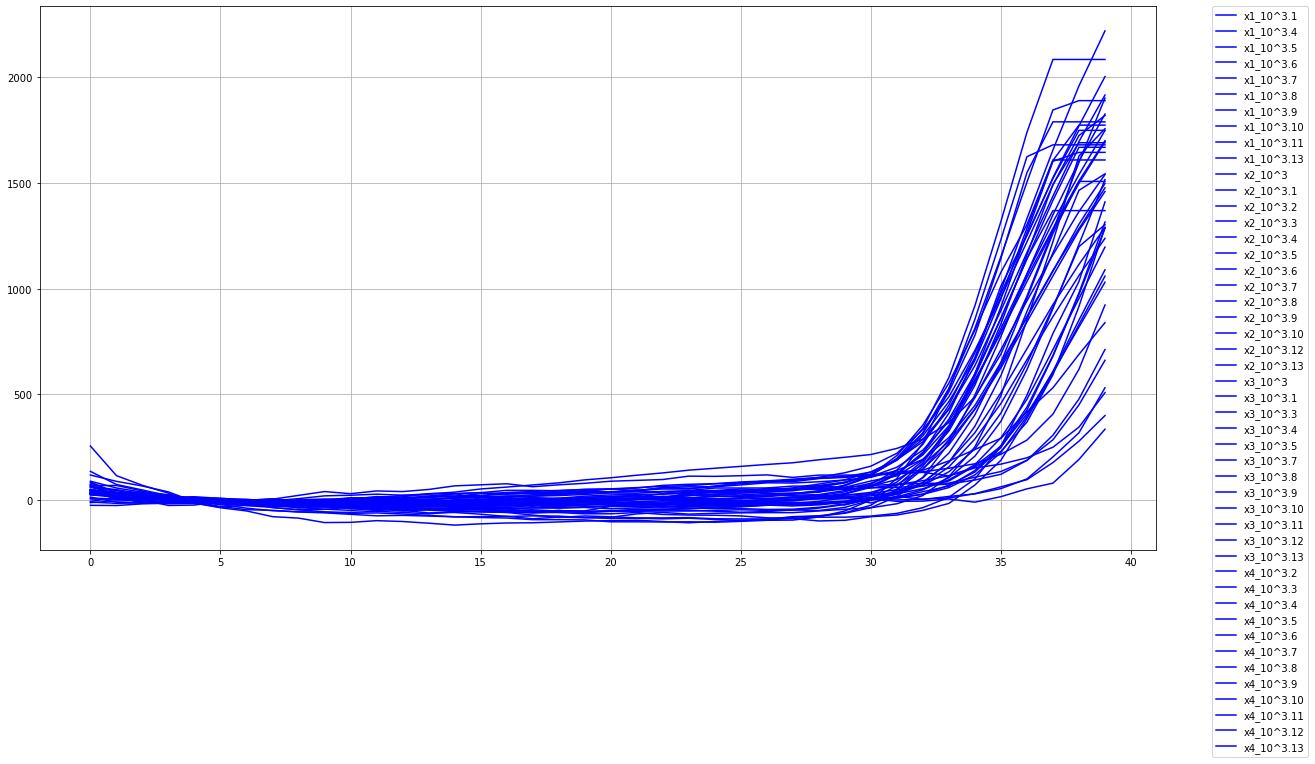

In [8]:
#plot all pcr baseline fitting data
sns.lineplot(data=pcr_lam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
sns.lineplot(data=pcr_lam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
sns.lineplot(data=pcr_lam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3)
plt.show()

#plot 10^5 data
sns.lineplot(data=pcr_lam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^4 data
sns.lineplot(data=pcr_lam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^3 data
sns.lineplot(data=pcr_lam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

In [9]:
#log data
pcr_loglam_df = np.log(pcr_lam_df)

c:\users\bioit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\bioit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


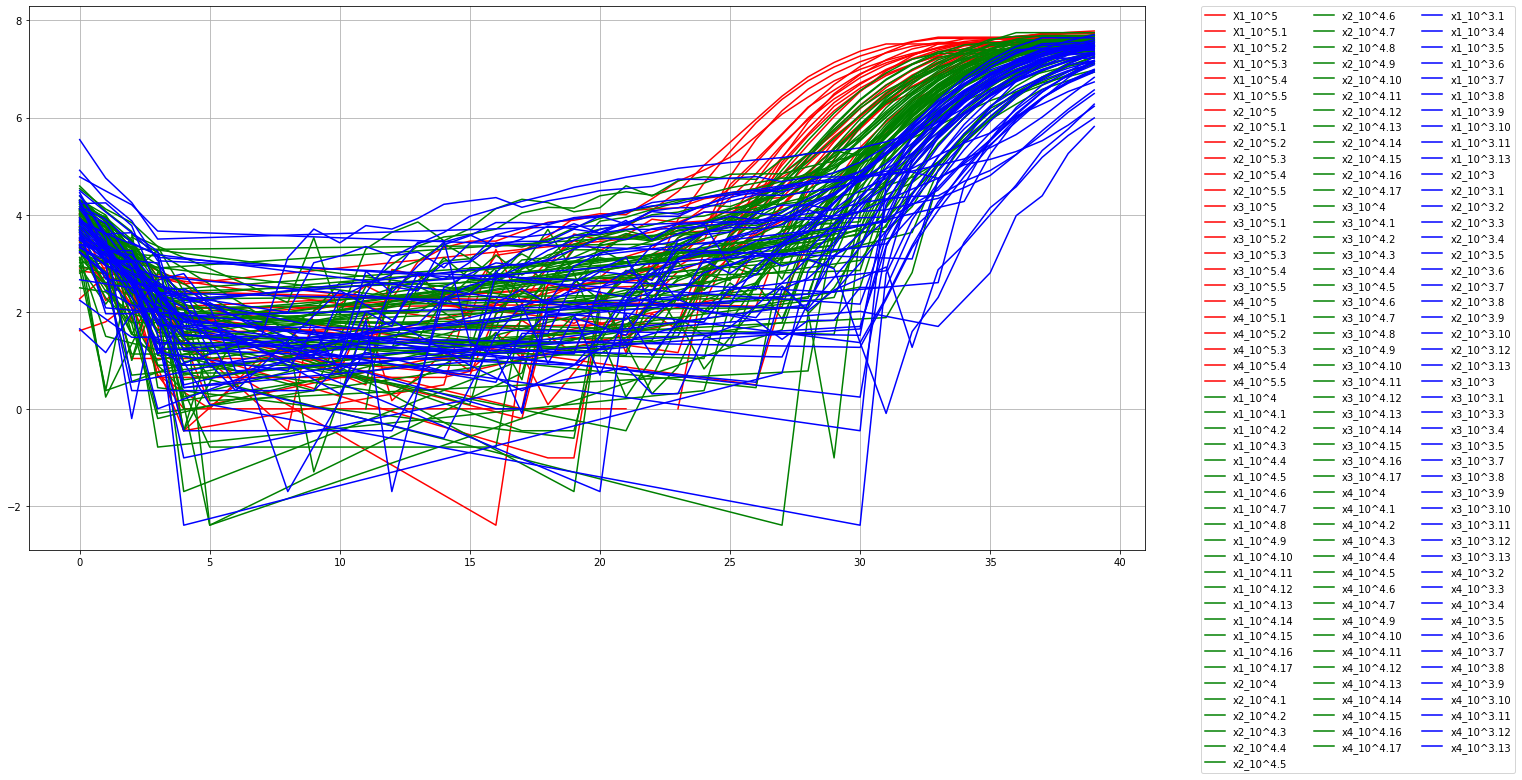

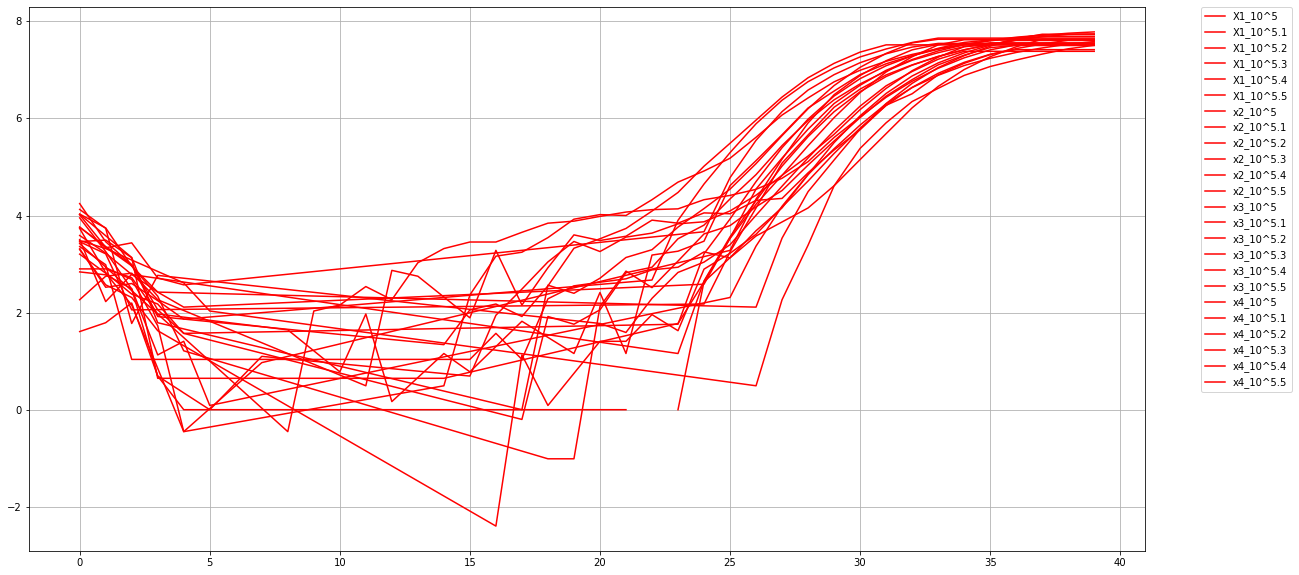

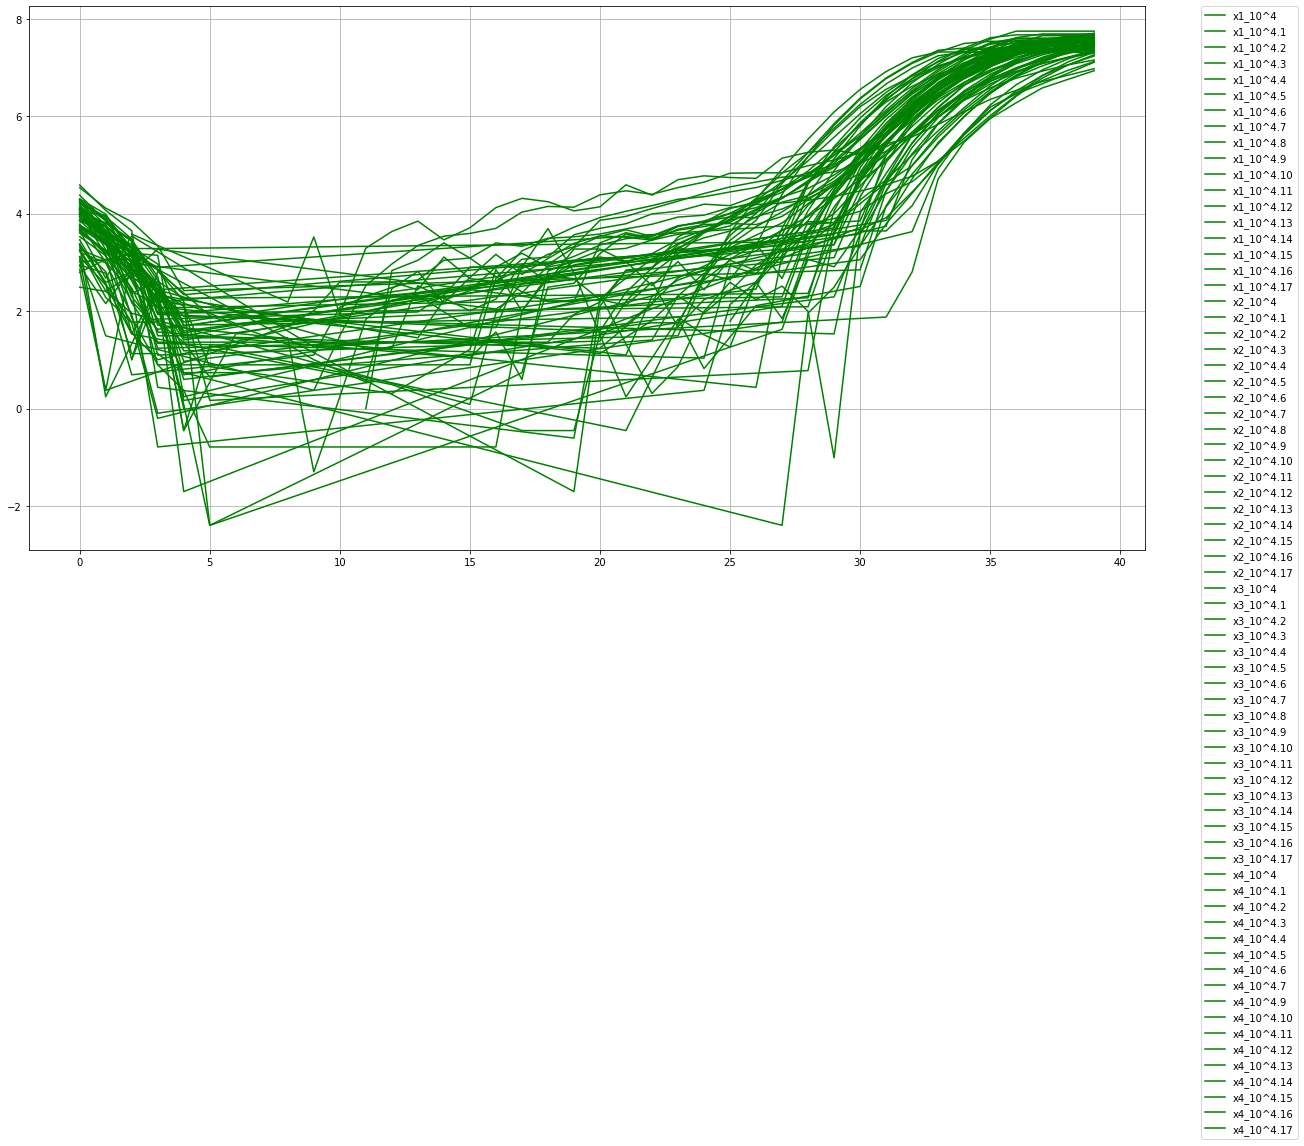

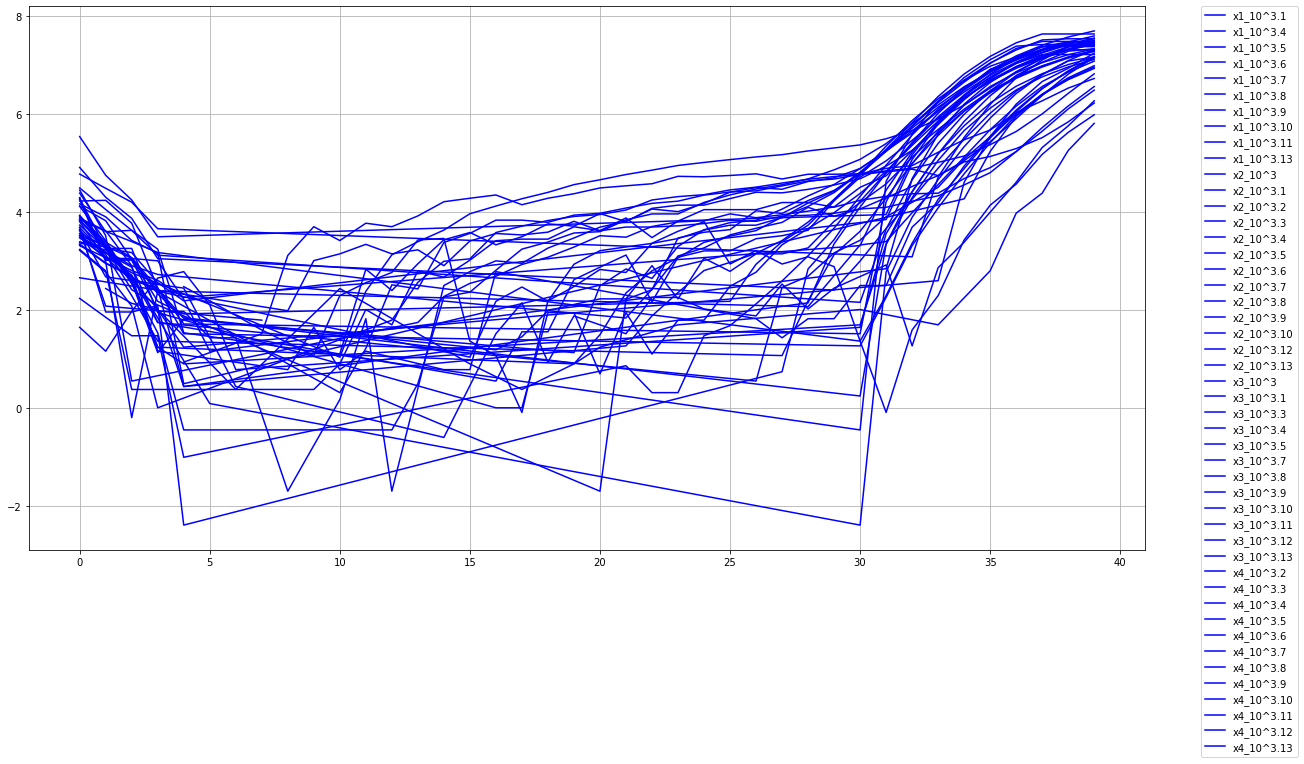

In [10]:
#plot all pcr baseline fitting data
sns.lineplot(data=pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
sns.lineplot(data=pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
sns.lineplot(data=pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3)
plt.show()

#plot 10^5 data
sns.lineplot(data=pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^4 data
sns.lineplot(data=pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^3 data
sns.lineplot(data=pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

In [11]:
#Function to calculate Ct
def calcCt(lDb, lth):
    ct = np.zeros(len(lDb.columns))
    ic = 0
    
    lDb_over10 = lDb[10:]#baseline은 제외
    
    for c in lDb.columns:
        tmp=lDb_over10.loc[lDb_over10[c]>lth]
        
        if tmp.empty:
            ct[ic]=-1
        else:
            id = tmp[c].index[0]
            rv = lDb[c].loc[id]
            lv = lDb[c].loc[id-1]
            dv = rv-lv
            ct[ic] = id - (rv-lth)/dv
        ic += 1
        
    return ct

In [12]:
#abi Ct value
abiCt=np.array([20.868,23.851,27.335,30.499,34.528])

#Range of log threshold value
ltharr=np.linspace(4.5, 6,1000)

In [13]:
# Get targets matching pcr_df
ct_target = []

for col in pcr_df.columns:
  if col[6] == '5':
    ct_target.append(abiCt[2])
  elif col[6] == '4':
    ct_target.append(abiCt[3])
  elif col[6] == '3':
    ct_target.append(abiCt[4])

ct_target = np.array(ct_target)

min_error:1.4415978692198408, thresholdValue:5.394894894894895, 596


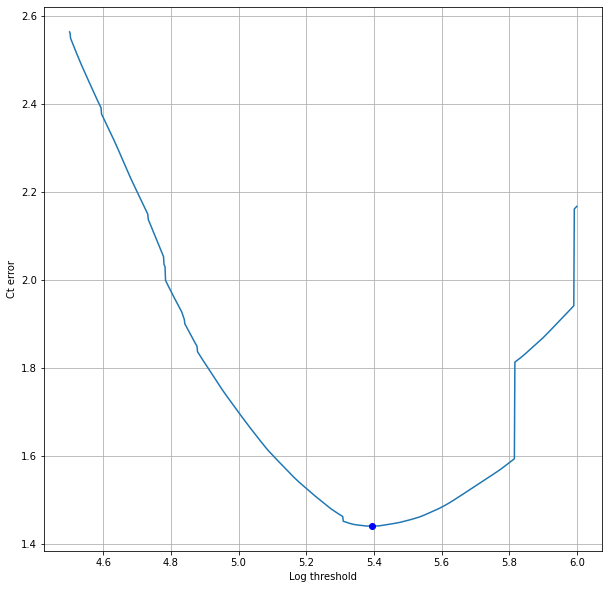

In [14]:
#Get optimized threshold value for all data
err = []
for th in ltharr:
    ct = calcCt(pcr_loglam_df, th)
    err.append(np.mean(np.abs(ct-ct_target)))

err = np.array(err)

midx = np.argmin(err)

print(f'min_error:{np.min(err)}, thresholdValue:{ltharr[np.argmin(err)]}, {midx}')

plt.figure(figsize=(10, 10))
plt.xlabel('Log threshold')
plt.ylabel('Ct error')

plt.plot(ltharr, err)
plt.plot(ltharr[midx],err[midx],'bo')
plt.show()

optim_thres = ltharr[np.argmin(err)]

min_error:1.2302604142398623, thresholdValue:5.033033033033033, 355


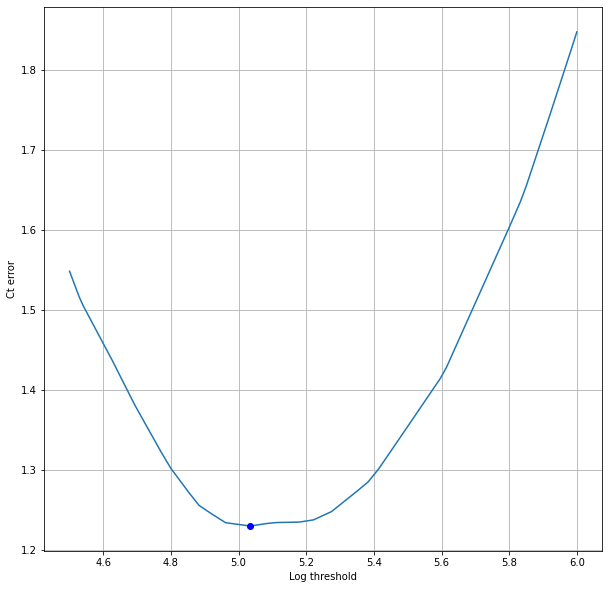

In [15]:
#Get threshold value 10^3
err = []
for th in ltharr:
    ct = calcCt(pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], th)
    err.append(np.mean(np.abs(ct-abiCt[2])))

err = np.array(err)

midx = np.argmin(err)

print(f'min_error:{np.min(err)}, thresholdValue:{ltharr[np.argmin(err)]}, {midx}')

plt.figure(figsize=(10, 10))
plt.xlabel('Log threshold')
plt.ylabel('Ct error')

plt.plot(ltharr, err)
plt.plot(ltharr[midx],err[midx],'bo')
plt.show()

optim_3_thres = ltharr[np.argmin(err)]

min_error:1.1523679132414881, thresholdValue:5.3093093093093096, 539


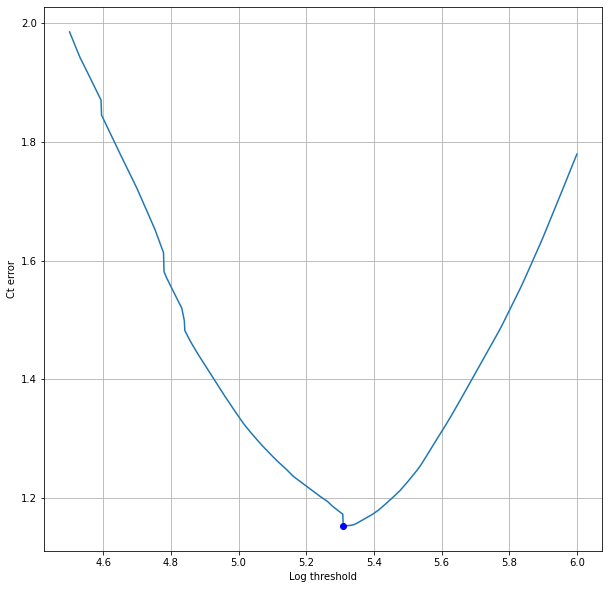

In [16]:
#Get threshold value 10^2
err = []
for th in ltharr:
    ct = calcCt(pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], th)
    err.append(np.mean(np.abs(ct-abiCt[3])))

err = np.array(err)

midx = np.argmin(err)

print(f'min_error:{np.min(err)}, thresholdValue:{ltharr[np.argmin(err)]}, {midx}')

plt.figure(figsize=(10, 10))
plt.xlabel('Log threshold')
plt.ylabel('Ct error')

plt.plot(ltharr, err)
plt.plot(ltharr[midx],err[midx],'bo')
plt.show()

optim_2_thres = ltharr[np.argmin(err)]

min_error:1.6758594251642074, thresholdValue:5.815315315315315, 876


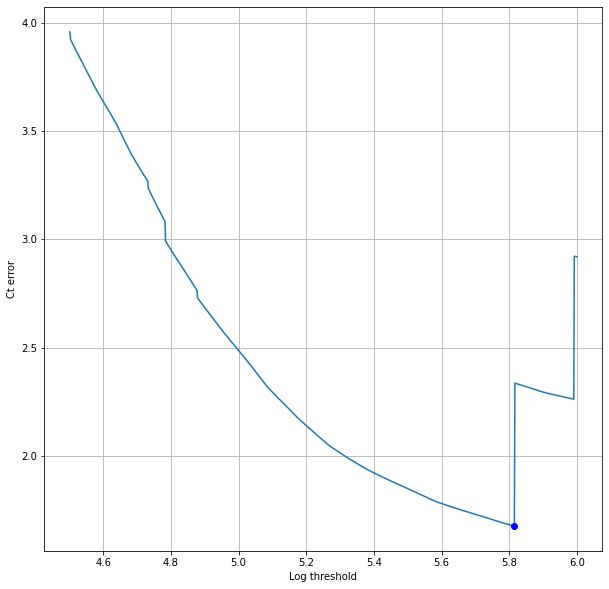

In [17]:
#Get threshold value 10^1
err = []
for th in ltharr:
    ct = calcCt(pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], th)
    err.append(np.mean(np.abs(ct-abiCt[4])))

err = np.array(err)

midx = np.argmin(err)

print(f'min_error:{np.min(err)}, thresholdValue:{ltharr[np.argmin(err)]}, {midx}')

plt.figure(figsize=(10, 10))
plt.xlabel('Log threshold')
plt.ylabel('Ct error')

plt.plot(ltharr, err)
plt.plot(ltharr[midx],err[midx],'bo')
plt.show()

optim_1_thres = ltharr[np.argmin(err)]

-----------------Optimized threshold value-----------------------
All data
minmum_error : 0.0018291449767033896, argmin_error:67
maximum_error : 4.365732623773631, argmax_error:117
mean_error : 1.4415978692198408
std_error : 1.0686288027098445

10^3 data
minmum_error : 0.020488612061168254, argmin_error:19
maximum_error : 3.1193087448751697, argmax_error:4
mean_error : 1.2916537988756323
std_error : 0.8548705504062231

10^2 data
minmum_error : 0.0018291449767033896, argmin_error:43
maximum_error : 3.401170101457023, argmax_error:1
mean_error : 1.1719665376991575
std_error : 0.9701863792458614

10^1 data
minmum_error : 0.04602064857215282, argmin_error:34
maximum_error : 4.365732623773631, argmax_error:22
mean_error : 1.9254804697779166
std_error : 1.1400304372000845
-----------------------------------------------------------------
-----------------10^3 Optimized threshold value-----------------------
minmum_error : 0.0007344285387276273, argmin_error:8
maximum_error : 3.299080456433202

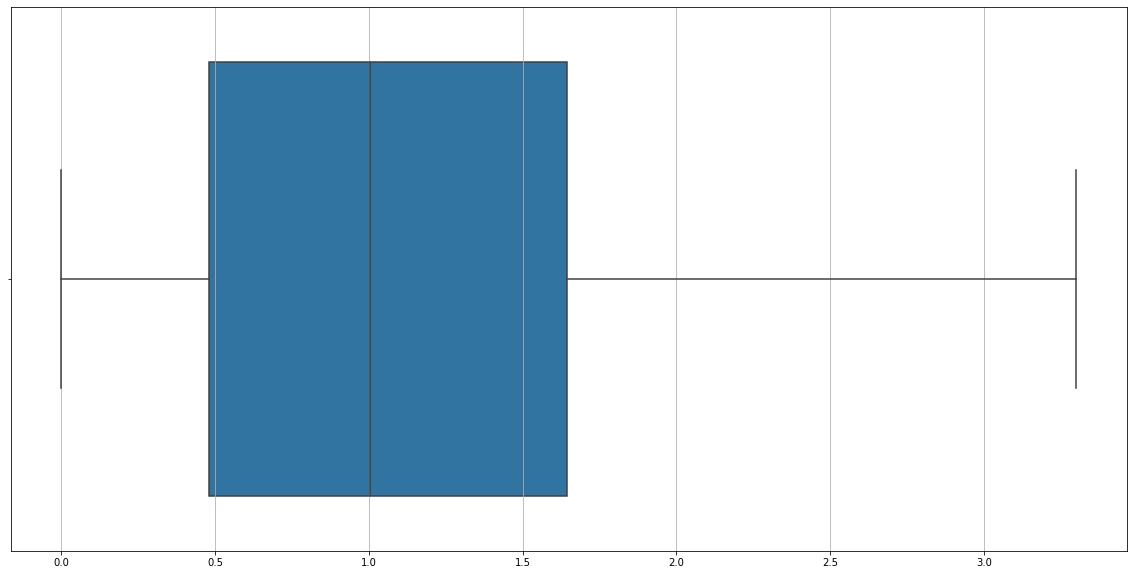

-----------------------------------------------------------------
-----------------10^2 Optimized threshold value-----------------------
minmum_error : 0.006499355912517046, argmin_error:69
maximum_error : 3.287950695517825, argmax_error:1
mean_error : 1.1523679132414881
std_error : 0.9548076537648826


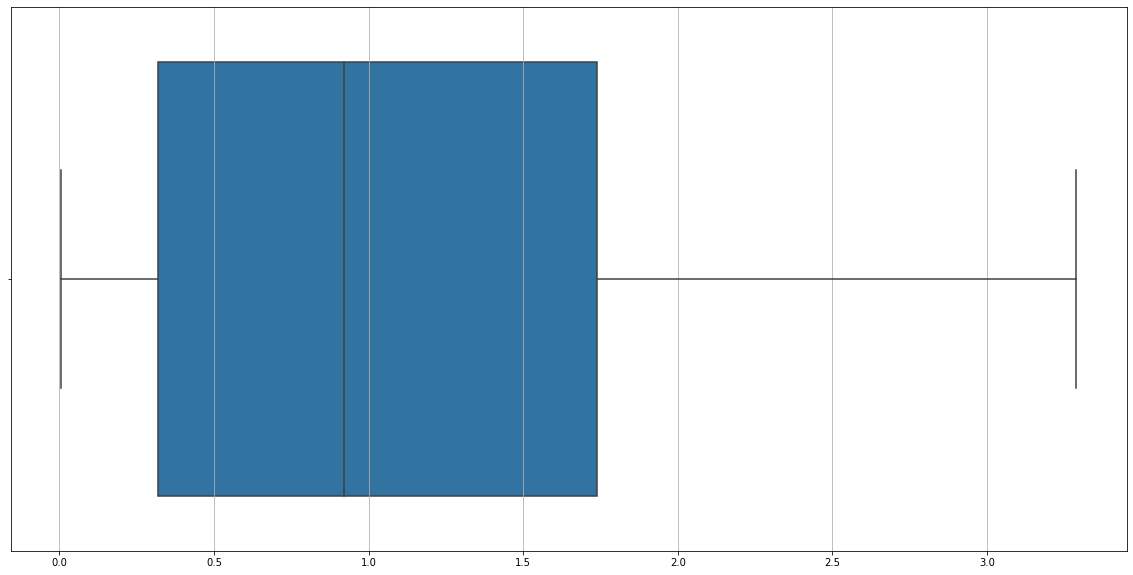

-----------------------------------------------------------------
-----------------10^1 Optimized threshold value-----------------------
minmum_error : 0.08486559258991377, argmin_error:45
maximum_error : 4.471691971258771, argmax_error:23
mean_error : 1.6758594251642074
std_error : 0.9779033352691727


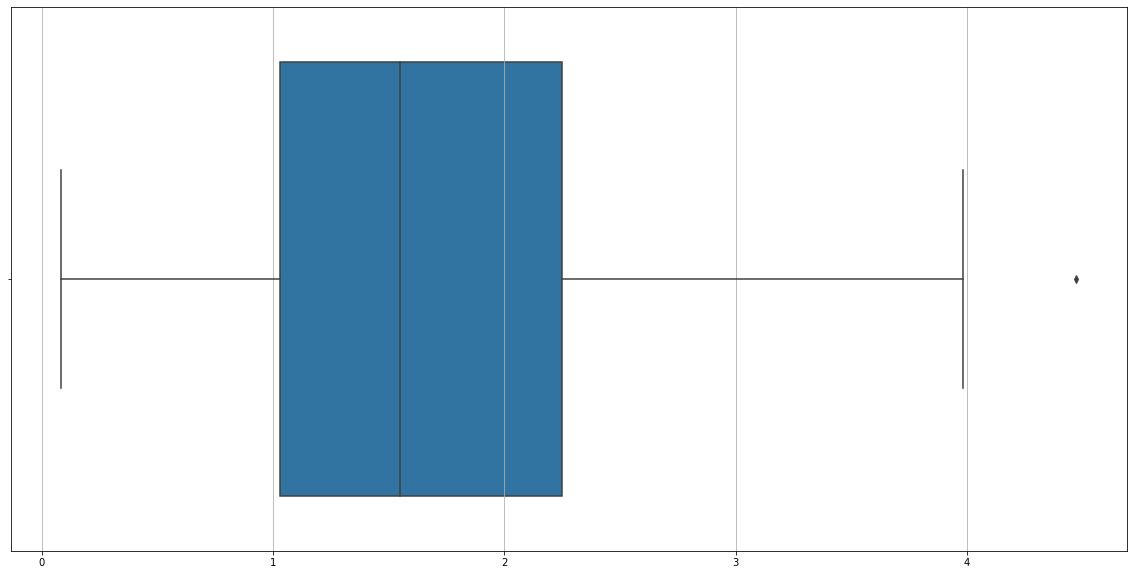

-----------------------------------------------------------------


In [18]:
ct = calcCt(pcr_loglam_df, optim_thres)
ct_error= np.abs(ct-ct_target)
print("-----------------Optimized threshold value-----------------------")
print('All data')
print(f'minmum_error : {np.min(ct_error)}, argmin_error:{np.argmin(ct_error)}')
print(f'maximum_error : {np.max(ct_error)}, argmax_error:{np.argmax(ct_error)}')
print(f'mean_error : {np.mean(ct_error)}')
print(f'std_error : {np.std(ct_error)}')

print('\n10^3 data')
print(f'minmum_error : {np.min(ct_error[:24])}, argmin_error:{np.argmin(ct_error[:24])}')
print(f'maximum_error : {np.max(ct_error[:24])}, argmax_error:{np.argmax(ct_error[:24])}')
print(f'mean_error : {np.mean(ct_error[:24])}')
print(f'std_error : {np.std(ct_error[:24])}')

print('\n10^2 data')
print(f'minmum_error : {np.min(ct_error[24:95])}, argmin_error:{np.argmin(ct_error[24:95])}')
print(f'maximum_error : {np.max(ct_error[24:95])}, argmax_error:{np.argmax(ct_error[24:95])}')
print(f'mean_error : {np.mean(ct_error[24:95])}')
print(f'std_error : {np.std(ct_error[24:95])}')

print('\n10^1 data')
print(f'minmum_error : {np.min(ct_error[95:])}, argmin_error:{np.argmin(ct_error[95:])}')
print(f'maximum_error : {np.max(ct_error[95:])}, argmax_error:{np.argmax(ct_error[95:])}')
print(f'mean_error : {np.mean(ct_error[95:])}')
print(f'std_error : {np.std(ct_error[95:])}')
print("-----------------------------------------------------------------")

ct = calcCt(pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '5']], optim_3_thres)
ct_error= np.abs(ct-abiCt[2])
print("-----------------10^3 Optimized threshold value-----------------------")
print(f'minmum_error : {np.min(ct_error)}, argmin_error:{np.argmin(ct_error)}')
print(f'maximum_error : {np.max(ct_error)}, argmax_error:{np.argmax(ct_error)}')
print(f'mean_error : {np.mean(ct_error)}')
print(f'std_error : {np.std(ct_error)}')
sns.boxplot(ct_error)
plt.show()
print("-----------------------------------------------------------------")

ct = calcCt(pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '4']], optim_2_thres)
ct_error= np.abs(ct-abiCt[3])
print("-----------------10^2 Optimized threshold value-----------------------")
print(f'minmum_error : {np.min(ct_error)}, argmin_error:{np.argmin(ct_error)}')
print(f'maximum_error : {np.max(ct_error)}, argmax_error:{np.argmax(ct_error)}')
print(f'mean_error : {np.mean(ct_error)}')
print(f'std_error : {np.std(ct_error)}')
sns.boxplot(ct_error)
plt.show()
print("-----------------------------------------------------------------")


ct = calcCt(pcr_loglam_df[[ col for col in pcr_df.columns.to_list() if col[6] == '3']], optim_1_thres)
ct_error= np.abs(ct-abiCt[4])
print("-----------------10^1 Optimized threshold value-----------------------")
print(f'minmum_error : {np.min(ct_error)}, argmin_error:{np.argmin(ct_error)}')
print(f'maximum_error : {np.max(ct_error)}, argmax_error:{np.argmax(ct_error)}')
print(f'mean_error : {np.mean(ct_error)}')
print(f'std_error : {np.std(ct_error)}')
sns.boxplot(ct_error)
plt.show()
print("-----------------------------------------------------------------")


In [19]:
ct = calcCt(pcr_loglam_df, optim_thres)
ct_error= np.abs(ct-ct_target)

pcr_df.loc[40] = ct_target#target
pcr_df.loc[41] = ct       #output
pcr_df.loc[42] = ct_error #abs(ct-ct_target)

#get .csv file
pcr_df.to_csv('./ct_result.csv', sep=',', na_rep='NaN')

In [20]:
display(pcr_df)

X1_10^5    X1_10^5.1    X1_10^5.2    X1_10^5.3    X1_10^5.4  \
0   2091.0000  2105.000000  1953.000000  1811.000000  2048.000000   
1   2077.0000  2094.000000  1939.000000  1810.000000  2039.000000   
2   2068.0000  2085.000000  1916.000000  1806.000000  2022.000000   
3   2056.0000  2065.000000  1908.000000  1797.000000  2022.000000   
4   2053.0000  2056.000000  1895.000000  1798.000000  2015.000000   
5   2037.0000  2051.000000  1883.000000  1795.000000  2013.000000   
6   2039.0000  2058.000000  1881.000000  1792.000000  2007.000000   
7   2033.0000  2066.000000  1876.000000  1787.000000  2010.000000   
8   2028.0000  2062.000000  1872.000000  1782.000000  2012.000000   
9   2025.0000  2061.000000  1871.000000  1780.000000  2012.000000   
10  2023.0000  2054.000000  1870.000000  1775.000000  2011.000000   
11  2021.0000  2056.000000  1868.000000  1770.000000  2012.000000   
12  2033.0000  2050.000000  1875.000000  1773.000000  2014.000000   
13  2031.0000  2053.000000  1872.000000  1772.000000  2016.000000   
14  2028.0000  2052.000000  1873.000000  1774.000000  2018.000000   
15  2024.0000  2053.000000  1872.000000  1768.000000  2022.000000   
16  2025.0000  2054.000000  1871.000000  1772.000000  2024.000000   
17  2024.0000  2056.000000  1867.000000  1774.000000  2022.000000   
18  2026.0000  2053.000000  1866.000000  1770.000000  2029.000000   
19  2029.0000  2055.000000  1868.000000  1777.000000  2032.000000   
20  2033.0000  2059.000000  1865.000000  1777.000000  2033.000000   
21  2041.0000  2060.000000  1868.000000  1778.000000  2034.000000   
22  2045.0000  2061.000000  1875.000000  1783.000000  2037.000000   
23  2054.0000  2072.000000  1878.000000  1789.000000  2038.000000   
24  2073.0000  2083.000000  1882.000000  1792.000000  2045.000000   
25  2099.0000  2104.000000  1890.000000  1804.000000  2042.000000   
26  2158.0000  2143.000000  1905.000000  1823.000000  2055.000000   
27  2269.0000  2220.000000  1931.000000  1860.000000  2067.000000   
28  2446.0000  2346.000000  1986.000000  1921.000000  2083.000000   
29  2688.0000  2532.000000  2068.000000  2039.000000  2120.000000   
30  2964.0000  2768.000000  2221.000000  2220.000000  2192.000000   
31  3243.0000  3025.000000  2445.000000  2469.000000  2314.000000   
32  3512.0000  3277.000000  2728.000000  2761.000000  2521.000000   
33  3760.0000  3518.000000  3046.000000  3060.000000  2799.000000   
34  3980.0000  3729.000000  3367.000000  3350.000000  3123.000000   
35  4080.0000  3920.000000  3685.000000  3623.000000  3457.000000   
36  4080.0000  4080.000000  3969.000000  3874.000000  3785.000000   
37  4080.0000  4080.000000  4080.000000  4080.000000  4080.000000   
38  4080.0000  4080.000000  4080.000000  4080.000000  4080.000000   
39  4080.0000  4080.000000  4080.000000  4080.000000  4080.000000   
40    27.3350    27.335000    27.335000    27.335000    27.335000   
41    26.9965    27.620946    29.394214    28.837475    30.454309   
42     0.3385     0.285946     2.059214     1.502475     3.119309   

      X1_10^5.5      x2_10^5    x2_10^5.1    x2_10^5.2    x2_10^5.3  ...  \
0   1996.000000  2217.000000  2073.000000  2091.000000  2534.000000  ...   
1   1981.000000  2242.000000  2053.000000  2065.000000  2514.000000  ...   
2   1982.000000  2238.000000  2040.000000  2051.000000  2478.000000  ...   
3   1978.000000  2229.000000  2023.000000  2041.000000  2488.000000  ...   
4   1975.000000  2224.000000  2010.000000  2040.000000  2463.000000  ...   
5   1967.000000  2216.000000  2009.000000  2035.000000  2452.000000  ...   
6   1962.000000  2217.000000  2002.000000  2025.000000  2447.000000  ...   
7   1957.000000  2226.000000  1998.000000  2026.000000  2454.000000  ...   
8   1954.000000  2214.000000  1992.000000  2018.000000  2455.000000  ...   
9   1952.000000  2215.000000  1996.000000  2017.000000  2457.000000  ...   
10  1950.000000  2219.000000  1991.000000  2020.000000  2451.000000  ...   
11  1948.000000  2218.000000  1993.000000  2022.000000  2

In [21]:
print(ct_target)

[27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335
 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335
 27.335 27.335 27.335 27.335 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.52

In [22]:
print(ct_target[:24])
print(ct_target[24:95])
print(ct_target[95:])

[27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335
 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335 27.335
 27.335 27.335 27.335 27.335]
[30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499 30.499
 30.499]
[34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528 34.528
 34.528 34.528 34.528 34.528 34.528 34